# Learning Objectives
## In this session you will:

1. Data Import and Loading
- Load the dataset and inspect its structure.

2. Exploratory Data Analysis (EDA) and Preprocessing
- Check and remove missing values.
- Detect and handle outliers; scale numerical data if needed.
- Visualize data distributions using histograms and boxplots.

3. Basic statistics
- Perform t-test
- Apply p-value to test hypothesis

4. Correlation and Linear Modeling
- Calculate pairwise correlations and visualize them using a heatmap.
- Fit a linear regression model to study relationships between features and the target variable, and use it to predict new data. Evaluate model performance using R².


# Introduction about the dataset

The case (dataset) we will be investigating today is the WHO world life expectancy data, adopted from https://www.kaggle.com/datasets/vikramamin/life-expectancy-who.

About this file
The CSV file contains 22 variables and 2938 rows. It is data pertaining to life expectancy of different countries spanning from 2000 to 2015. The columns include

1. Country: Country name
2. Year: Year of the data
3. Status: Country status of developed or developing
4. Life_Expectancy: Life expectancy in age
5. Adult_Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6. infant.deaths: Number of Infant Deaths per 1000 population
7. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. percentage.expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis.B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles: number of reported cases per 1000 population
11. BMI: Average Body Mass Index of entire population
under.five.deaths: Number of under-five deaths per 1000 population
12. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
13. Total.expenditure: General government expenditure on health as a percentage of total government expenditure (%)
14. Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)room)
15. HIV.AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
16. GDP: Gross Domestic Product per capita (in USD)
17. Population: Population of the country
18. thinness..1.19.years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
19. thinness.5.9.years: Prevalence of thinness among children for Age 5 to 9(%)
20. Income.composition.of.resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
21. Schooling: Number of years of Schooling(years)

# Download the dataset
Right click the link to download the dataset:
https://github.com/holab-hku/2025-HKU-Budding-Researcher-Programme/blob/main/life_expectancy_data_WHO.csv

In [38]:
# some simple stuff
def welcome(name):
    print(f"welcome {name}")

d_name = "a"
welcome(d_name)

welcome a


# 1. Data Loading

In [37]:
# 1.1 Import and Load Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [2]:
df = pd.read_csv('life_expectancy_data_WHO.csv') # read data using pandas

In [3]:
df.head() # check data is imported

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df['Year'].dtype

dtype('int64')

In [5]:
df.Year

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

In [6]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# 2. Data Cleaning

In [7]:
# 2.1 Rename messy column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.rename(columns={'Total expenditure':'total_expenditure'}, inplace=True)

In [9]:
df.rename(columns={'Life expectancy ':'life_expectancy'}, inplace=True)

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'total_expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
## 2.2 Check missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
total_expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
## 2.3 Dealing with Missing Value: Remove NAs
df = df.dropna() # there is more sensible way to deal in in detail which you could refer to this tutorial link:

In [13]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
total_expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [14]:
## 2.4: Removing Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x11162ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x11162f230>,
 'boxes': [<matplotlib.lines.Line2D at 0x11162ee40>],
 'medians': [<matplotlib.lines.Line2D at 0x11162f4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11162f620>],
 'means': []}

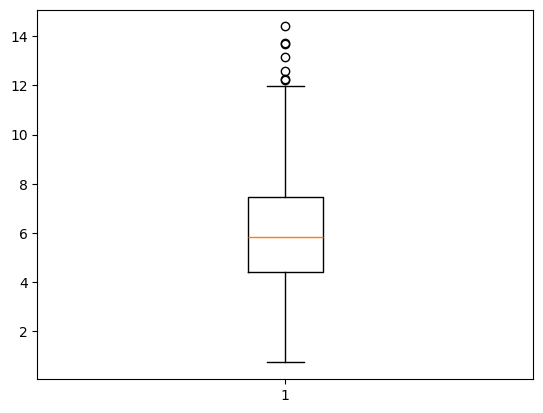

In [15]:
plt.boxplot(df['total_expenditure'])

<Axes: ylabel='total_expenditure'>

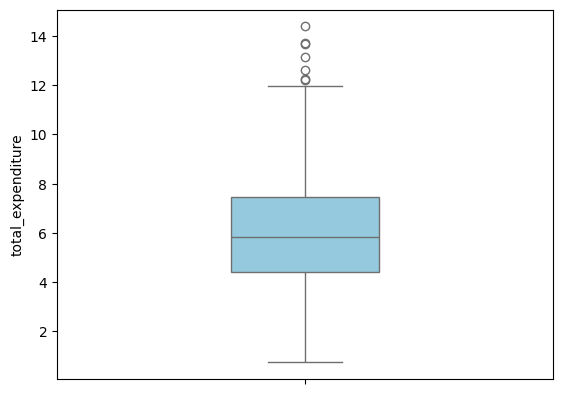

In [16]:
sns.boxplot(y=df["total_expenditure"], color="skyblue", width=0.3)

<Axes: xlabel='total_expenditure', ylabel='Count'>

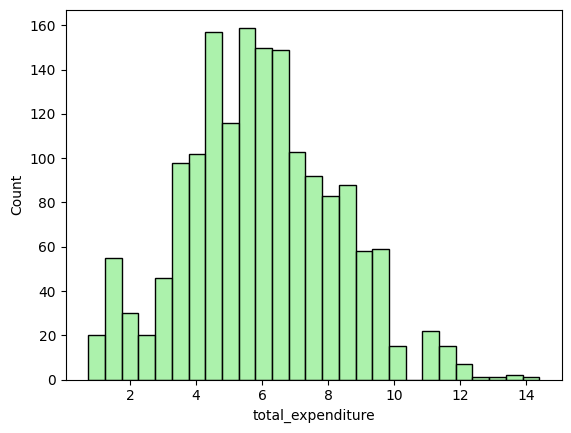

In [17]:
sns.histplot(df["total_expenditure"], color="lightgreen")

In [18]:
def outlier_diagnostics(df, cols):
    records = []
    for col in cols:
        x = df[col].dropna()
        q1, q3 = x.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        lower_frac = (x < lower).mean()
        upper_frac = (x > upper).mean()
        records.append({
            'Column': col,
            'Count': count,
            'Lower Limit': lower_frac,
            'Upper Limit': upper_frac,
            'Lower Limit (%)': round(lower_frac*100, 2),
            'Upper Limit (%)': round(upper_frac*100, 2),
            'Percentage of outliers': round(count / df[col].dropna().shape[0] * 100, 2)
        })
    return pd.DataFrame(records).sort_values('Upper Limit (%)', ascending=False).reset_index(drop=True)

In [19]:
# Example
cols = ["total_expenditure"]
diagnostics = outlier_diagnostics(df, cols)
print(diagnostics)

              Column  Count  Lower Limit  Upper Limit  Lower Limit (%)  \
0  total_expenditure      7          0.0     0.004245              0.0   

   Upper Limit (%)  Percentage of outliers  
0             0.42                    0.42  


In [20]:
from scipy.stats.mstats import winsorize
def winsorize_outlier(df, col,lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    print(wins_data)
    if show_plot == True:
        sns.boxplot(y=wins_data, color="skyblue", width=0.3)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

[8.16 8.18 8.13 ... 6.53 6.16 7.1 ]


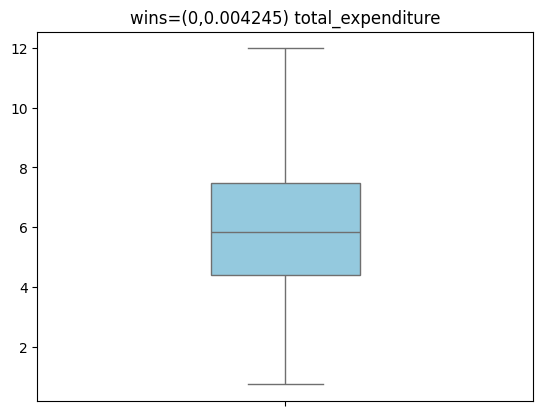

In [21]:
winsorize_outlier(df, col="total_expenditure", upper_limit=0.004245, show_plot=True)

# 3. Basic Statistical Analysis (t-test)

In [22]:
df['Status']

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 1649, dtype: object

In [23]:
developing_country = (df.query("Status == 'Developing'")) # similar to use df[df.Status == 'Developed']
developed_country = (df.query("Status == 'Developed'"))

In [24]:
mean_exp_developing_country = developing_country['life_expectancy'].mean()
mean_exp_developed_country = developed_country['life_expectancy'].mean()

In [25]:
significance = 0.05
t_test = stats.ttest_ind(a = developing_country['life_expectancy'], b = developing_country['life_expectancy'], equal_var = False )
t_test

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(2812.0))

In [26]:
p_value = t_test[1]
p_value

np.float64(1.0)

In [27]:
def two_sample_t_test(s, p):
    if p < s:
        return 'reject null hypothesis'
    else:
        return 'cannot reject null hypothesis'

In [28]:
two_sample_t_test(significance, p_value)

'cannot reject null hypothesis'

# 4. Advanced Statistics (correlation and linear regression)

In [29]:
# 4.1 Correlation

<Axes: >

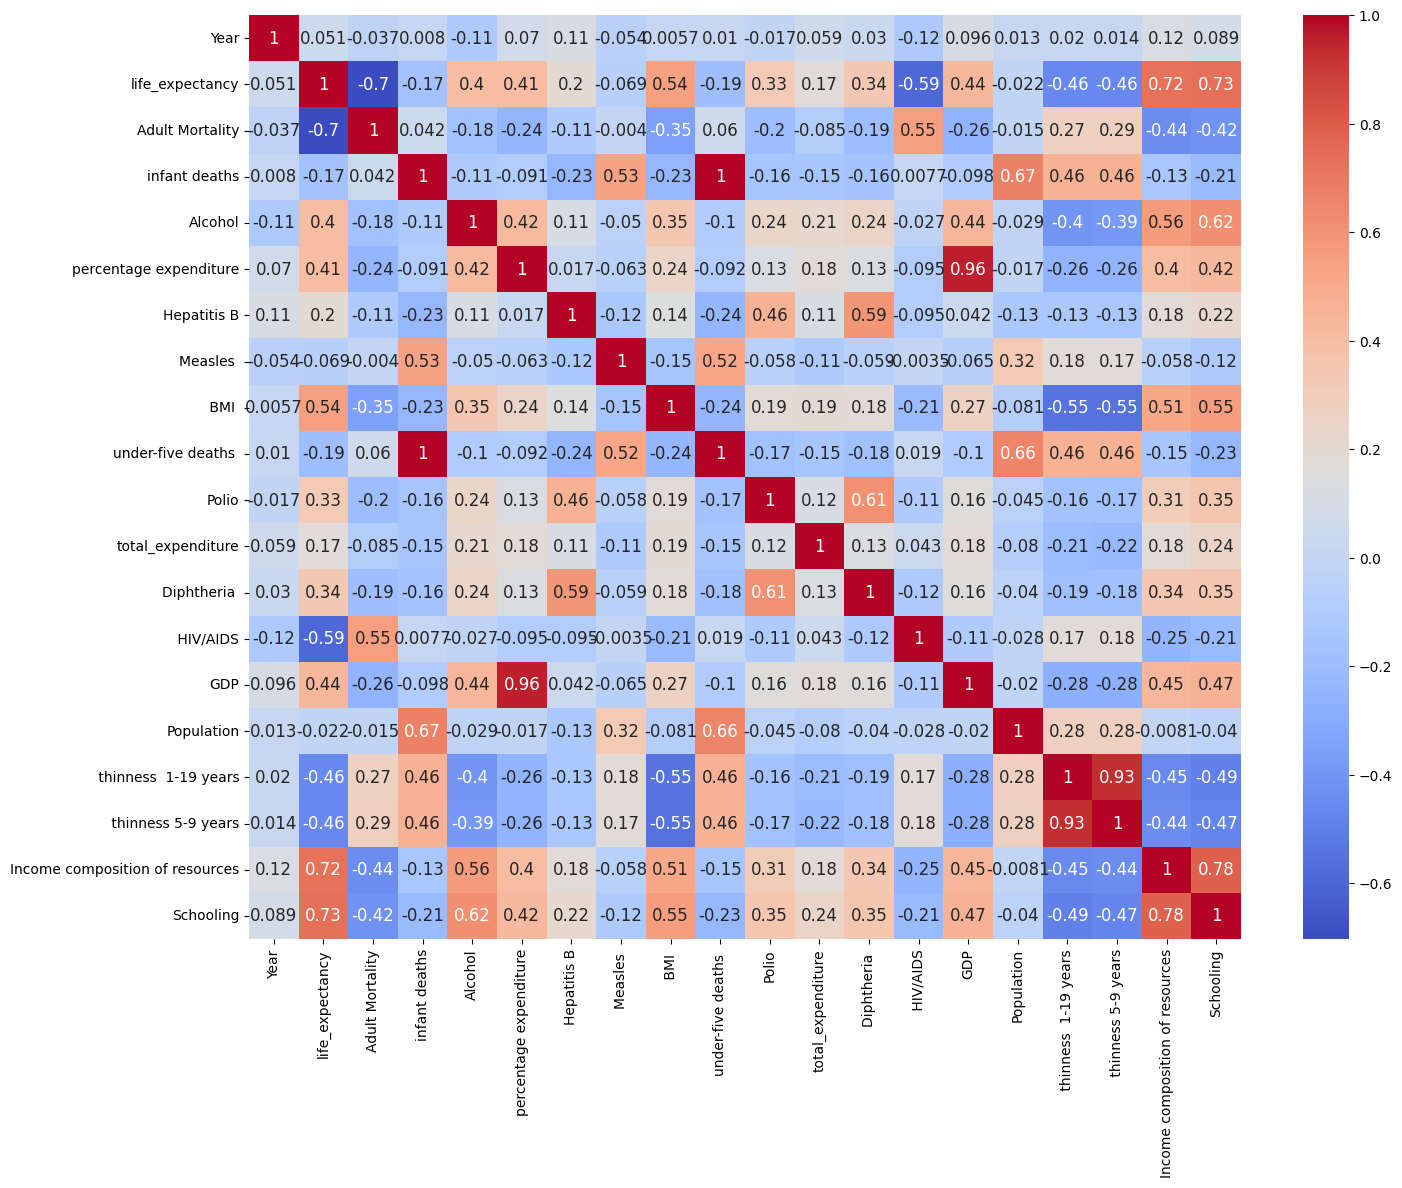

In [30]:
# compute correlation matrix
corr_matrix = df.corr(numeric_only=True)  # ensures only numeric cols

# create figure and plot
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', annot_kws={"size": 12} )


In [31]:
## 4.2 Linear regression modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['total_expenditure']]
y = df['life_expectancy']

model = LinearRegression()
model.fit(X, y)


print(f"R² = {model.score(X, y):.3f}") # R square is the level of fitness in regression

R² = 0.031


In [32]:
model.coef_ # b

array([0.668423])

In [33]:
model.intercept_ # a

np.float64(65.32122729043911)

In [34]:
### Make prediction
new_sample = pd.DataFrame({
    'total_expenditure': [8]})

model.predict(new_sample)

array([70.66861131])

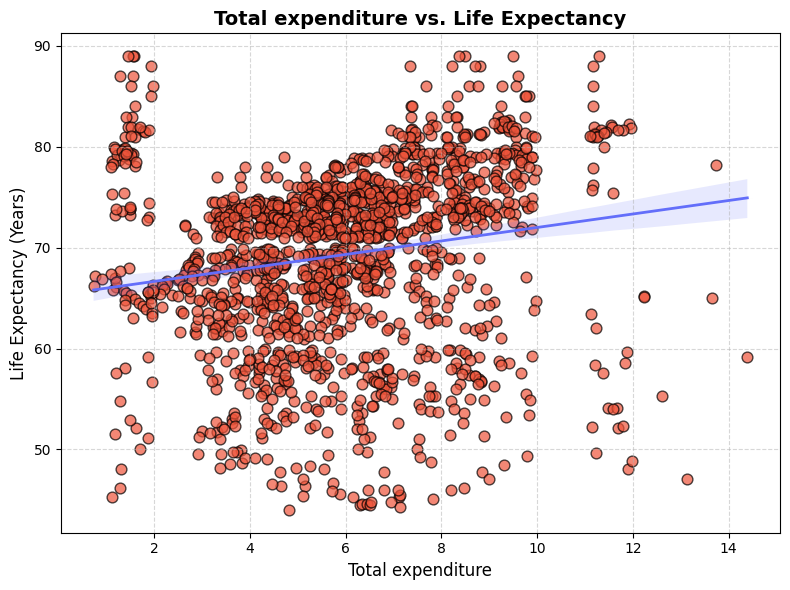

In [35]:
# 4. Linear Regression
# (Optional) Fitting the best line
plt.figure(figsize=(8, 6))

sns.regplot(
    data=df,
    x="total_expenditure",
    y="life_expectancy",
    scatter_kws={'s': 60, 'color': '#EF553B', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#636EFA', 'linewidth': 2},
)

plt.title("Total expenditure vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Total expenditure", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
## 4.2 Getting co-efficient for linear equation
from sklearn.linear_model import LinearRegression
factors = ['Schooling', 'total_expenditure', 'percentage expenditure']

target = 'life_expectancy'

scores = []
for col in factors:
    X = df[[col]].dropna()
    y = df.loc[X.index, target]  # align target with non-missing X
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    scores.append((col, r2))

# Sort descending by R²
ranked = pd.DataFrame(scores, columns=['Feature', 'R²']).sort_values('R²', ascending=False).reset_index(drop=True)
print(ranked)

                  Feature        R²
0               Schooling  0.529445
1  percentage expenditure  0.167797
2       total_expenditure  0.030526
